# SciPy

The SciPy library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization.

Library documentation: <a>http://www.scipy.org/scipylib/index.html</a>

## Task1 
What is t-test?
See example in the end of the document

### Answer:
The t test compares two means and tells if they are different from each other. The t test also tells how significant the differences are; In other words it lets us know if those differences could have happened by chance.

---

In [4]:
# needed to display the graphs
%matplotlib inline
from pylab import *

In [5]:
from numpy import *
from scipy.integrate import quad, dblquad, tplquad

In [6]:
# integration
val, abserr = quad(lambda x: exp(-x ** 2),  Inf, Inf)
val, abserr

(0.0, 0.0)

In [7]:
from scipy.integrate import odeint, ode

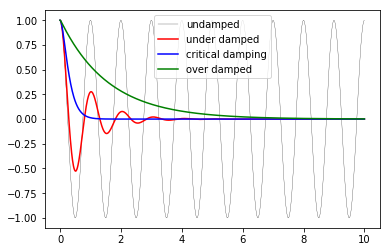

In [8]:
# differential equation
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

# initial state
y0 = [1.0, 0.0]

# time coodinate to solve the ODE for
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

# solve the ODE problem for three different values of the damping ratio
y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

In [9]:
from scipy.fftpack import *

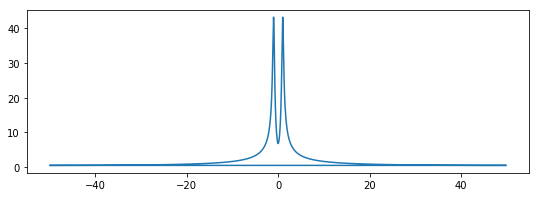

In [10]:
# fourier transform
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

### Linear Algebra

In [11]:
A = array([[1,2,3], [4,5,6], [7,8,9]])
b = array([1,2,3])

In [12]:
# solve a system of linear equations
x = solve(A, b)
x

array([-0.23333333,  0.46666667,  0.1       ])

In [13]:
# eigenvalues and eigenvectors
A = rand(3,3)
B = rand(3,3)

evals, evecs = eig(A)

evals

array([ 1.63745179, -0.27099717,  0.29221869])

In [14]:
evecs

array([[ 0.52266728,  0.89586684,  0.0465981 ],
       [ 0.75282179, -0.40859634, -0.66157783],
       [ 0.40009781, -0.17456128,  0.74842727]])

In [15]:
svd(A)

(array([[-0.54649945, -0.56455691,  0.61855787],
        [-0.72419462,  0.68951555, -0.01051025],
        [-0.42057163, -0.45370013, -0.78566894]]),
 array([1.67154471, 0.33921771, 0.22868873]),
 array([[-0.4132404 , -0.71035796, -0.56975779],
        [ 0.60139999,  0.25692064, -0.75651162],
        [-0.68377659,  0.6552735 , -0.32103928]]))

### Optimization

In [16]:
from scipy import optimize

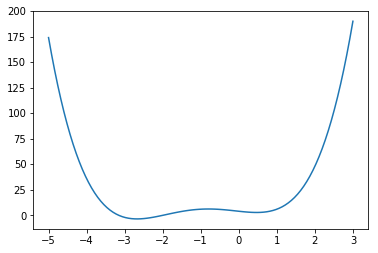

In [17]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [18]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 18
         Gradient evaluations: 6


array([0.46961743])

### Statistics

In [19]:
from scipy import stats

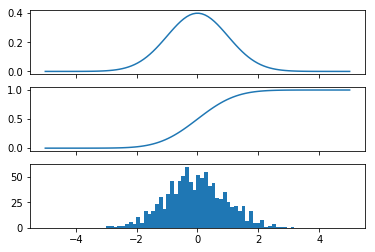

In [20]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

x = linspace(-5,5,100)

fig, axes = subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

In [21]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [22]:
# t-test example
t_statistic, p_value = stats.ttest_ind(Y.rvs(size=1000), Y.rvs(size=1000))
t_statistic, p_value

(-1.5051954859504642, 0.1324318875388194)